In [2]:
# Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df_mex = df[df['job_country'] == 'Mexico'].copy()

In [4]:
df_mex['job_posted_month'] = df_mex['job_posted_date'].dt.strftime('%B')

In [6]:
df_mex_pivot = df_mex.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [7]:
df_mex_pivot.reset_index(inplace=True)
df_mex_pivot['month_no'] = pd.to_datetime(df_mex_pivot['job_posted_month'], format='%B').dt.month

df_mex_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
0,April,95,22,159,287,168,22,15,57,30,79,4
1,August,131,23,310,332,288,25,27,62,44,101,8
2,December,185,67,294,450,305,63,31,90,69,282,12
3,February,79,39,145,254,161,26,20,57,25,144,2
4,January,99,36,355,459,281,28,31,118,60,111,1
5,July,117,29,254,360,255,32,38,54,38,94,7
6,June,113,15,230,436,234,35,25,96,28,61,6
7,March,87,36,156,224,162,34,14,61,28,139,3
8,May,51,7,156,271,186,18,29,50,21,25,5
9,November,173,49,262,462,305,37,34,67,62,189,11


In [8]:
df_mex_pivot.sort_values('month_no', inplace=True)
df_mex_pivot.set_index('job_posted_month', inplace=True)

In [ ]:
df_mex_pivot.drop(columns='month_no', inplace=True)
df_mex_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,99,36,355,459,281,28,31,118,60,111
February,79,39,145,254,161,26,20,57,25,144
March,87,36,156,224,162,34,14,61,28,139
April,95,22,159,287,168,22,15,57,30,79
May,51,7,156,271,186,18,29,50,21,25
June,113,15,230,436,234,35,25,96,28,61
July,117,29,254,360,255,32,38,54,38,94
August,131,23,310,332,288,25,27,62,44,101
September,49,20,222,371,208,36,37,63,48,71


In [28]:
df_mex_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col='job_posted_month')
df_mex_software_pivot

# these are not real numbers nor are they from Mexico, but let's take them as if they were for the sake of the example

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [29]:
df_mex_merged = df_mex_pivot.merge(df_mex_software_pivot, on= 'job_posted_month')
df_mex_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,99,36,355,459,281,28,31,118,60,111,13619,9827,5108,4348
February,79,39,145,254,161,26,20,57,25,144,11456,9116,7298,4284
March,87,36,156,224,162,34,14,61,28,139,11102,8178,5814,4159
April,95,22,159,287,168,22,15,57,30,79,14037,9209,7232,4220
May,51,7,156,271,186,18,29,50,21,25,12126,8864,6718,4980
June,113,15,230,436,234,35,25,96,28,61,12003,8065,5902,4781
July,117,29,254,360,255,32,38,54,38,94,11914,8061,6839,4344
August,131,23,310,332,288,25,27,62,44,101,11571,8191,7413,4104
September,49,20,222,371,208,36,37,63,48,71,14016,8447,6139,4094


## Pandas Cheatsheet 
pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [30]:
top_5 = (
    df_mex_merged
    .sum()
    .sort_values(ascending=False)
    .head()
    .index    # Get the index of the top 5
    .to_list()
)

top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Engineer']

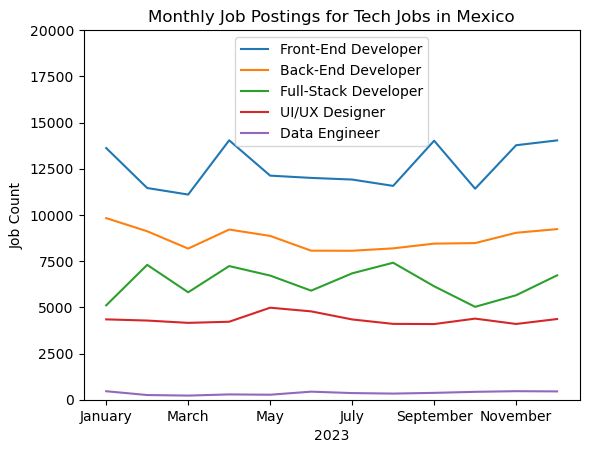

In [31]:
df_mex_merged[top_5].plot(kind='line')
plt.title('Monthly Job Postings for Tech Jobs in Mexico')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 20000)
plt.legend()
plt.show()

## SQL Course
to learn about sql joins (right, inner, etc) lukeb.co/sql_joins